#Building Darknet

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

In [17]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

#Download YOLOv4 weights

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

#Define Helper Functions to view image



In [6]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

#Running Detections with Darknet and YOLOv4!

In [22]:
!ls
%cd darknet

darknet  gdrive  sample_data
/content/darknet


In [23]:
# run darknet detection on test images
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv  

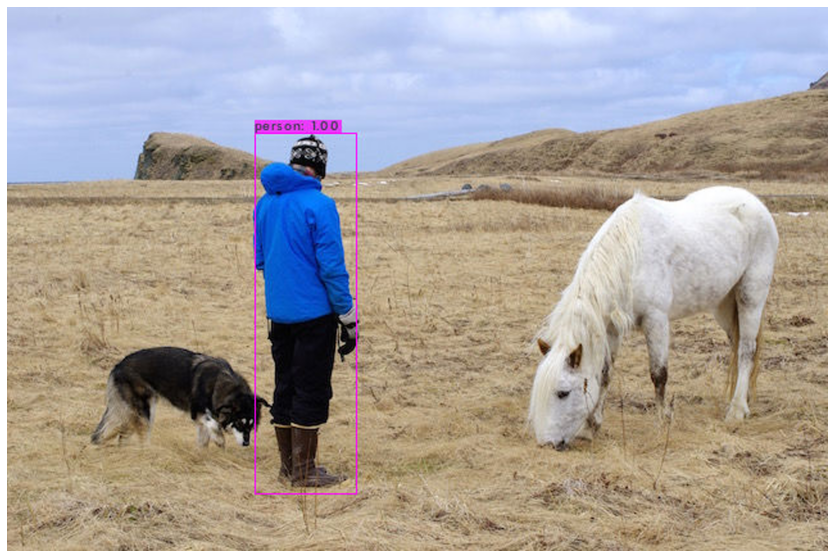

In [24]:
# show image using our helper function
imShow('predictions.jpg')

In [11]:

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

#Uploading Local or Google Drive Files to Use


### Method 1: Local Files

In [14]:
!ls
%cd content/darknet

3rdparty	DarknetConfig.cmake.in	json_mjpeg_streams.sh  results
backup		darknet_images.py	LICENSE		       scripts
build		darknet.py		Makefile	       src
build.ps1	darknet_video.py	net_cam_v3.sh	       vcpkg.json
cfg		data			net_cam_v4.sh	       video_yolov3.sh
cmake		image_yolov3.sh		obj		       video_yolov4.sh
CMakeLists.txt	image_yolov4.sh		predictions.jpg        yolov4.weights
darknet		include			README.md
[Errno 2] No such file or directory: 'content/darknet'
/content/darknet


In [25]:
# try out the upload helper function! (I uploaded an image called highway.jpg, upload whatever you want!)
%cd ..
upload()
%cd darknet

/content


Saving people.jpeg to people.jpeg
saved file people.jpeg
/content/darknet


 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv  

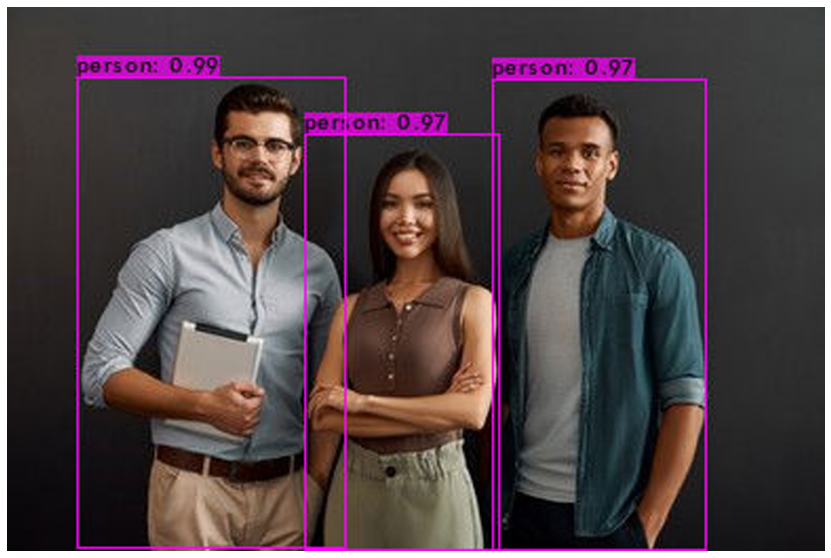

In [26]:
# run darknet with YOLOv4 on your personal image
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights ../people.jpeg
imShow('predictions.jpg')

### Method 2: Google Drive
Images can also be uploaded from your Google Drive and easily have YOLOv4 detections run on them.

In [16]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [ ]:
# cd back into the darknet folder to run detections
%cd darknet

In [ ]:
# run detections on image within your Google Drive!
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights /mydrive/images/street.jpg
imShow('predictions.jpg')

## Local Machine Video

In [27]:
# upload the video of your choosing!
upload()

Saving testing.mp4 to testing.mp4
saved file testing.mp4


In [30]:
!./darknet detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show 'testing.mp4' -i 0 -out_filename results.avi

Streaming output truncated to the last 5000 lines.

person: 100% 
person: 99% 
person: 99% 
person: 97% 
person: 96% 
person: 96% 
person: 94% 

FPS:7.5 	 AVG_FPS:7.5

 cvWriteFrame 
Objects:

person: 100% 
person: 99% 
person: 98% 
person: 97% 
person: 96% 
person: 96% 
person: 94% 

FPS:7.5 	 AVG_FPS:7.5

 cvWriteFrame 
Objects:

person: 100% 
person: 99% 
person: 98% 
person: 97% 
person: 96% 
person: 95% 
person: 94% 

FPS:7.5 	 AVG_FPS:7.5

 cvWriteFrame 
Objects:

person: 99% 
person: 99% 
person: 98% 
person: 98% 
person: 97% 
person: 97% 
person: 95% 

FPS:7.5 	 AVG_FPS:7.5

 cvWriteFrame 
Objects:

person: 99% 
person: 99% 
person: 98% 
person: 98% 
person: 97% 
person: 97% 
person: 95% 

FPS:7.5 	 AVG_FPS:7.5

 cvWriteFrame 
Objects:

person: 99% 
person: 99% 
person: 98% 
person: 98% 
person: 97% 
person: 97% 
person: 95% 

FPS:7.5 	 AVG_FPS:7.5

 cvWriteFrame 
Objects:

person: 99% 
person: 99% 
person: 98% 
person: 97% 
person: 97% 
person: 95% 
person: 83% 

FPS:7.5 	 AVG

In [31]:
# download the video with detections shown
download('results.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Google Drive Video
Here is how to run detector on video stored in Google Drive and save video straight to Google drive as well!

In [ ]:
!./darknet detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show /mydrive/videos/test.mp4 -i 0 -out_filename /mydrive/videos/results.avi